In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [ ]:
#Generate a synthtetic dataset
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42) #Make regresion es una función que genera estos datasets

#Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Fit regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values using the test set
y_pred = model.predict(X_test)

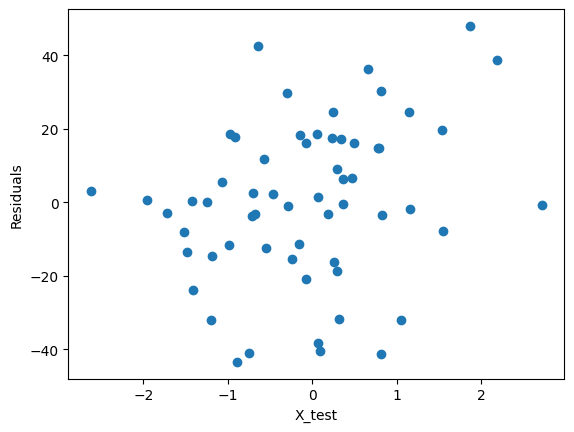

In [ ]:
#Residuals
residuals = y_test - y_pred

#Plot residuals
plt.scatter(X_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('X_test')
plt.ylabel('Residuals')
plt.show()

#Aquí podemos ver que están igualmente repartidos los residuos

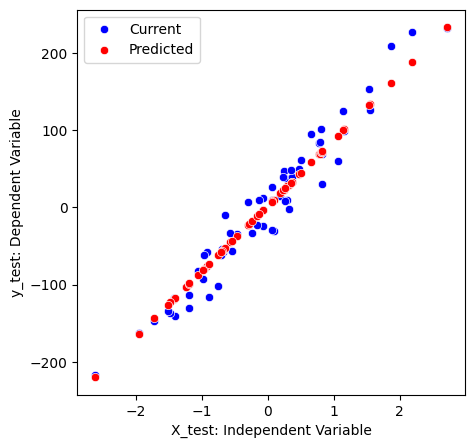

In [ ]:
#Plotting data and regression
plt.figure(figsize=(5, 5))
sns.scatterplot(x=X_test.flatten(), y=y_test, color="blue", label="Current")
sns.scatterplot(x=X_test.flatten(), y=y_pred, color='red', label ="Predicted")
plt.xlabel('X_test: Independent Variable')
plt.ylabel('y_test: Dependent Variable')
plt.legend()
plt.show()

In [ ]:
#GEnerate dataset

np.random.seed(42)
X_example = np.random.rand(200, 1) * 100
y_example = 2 * X_example.squeeze() + np.random.normal(0,X_example.squeeze(), 200)

#Split in test and train
X_train, X_test, y_train, y_test = train_test_split(X_example, y_example, test_size=0.3, random_state=42)

# Train a model
model_h = LinearRegression()
model_h.fit(X_train, y_train)
y_pred_h = model_h.predict(X_test)

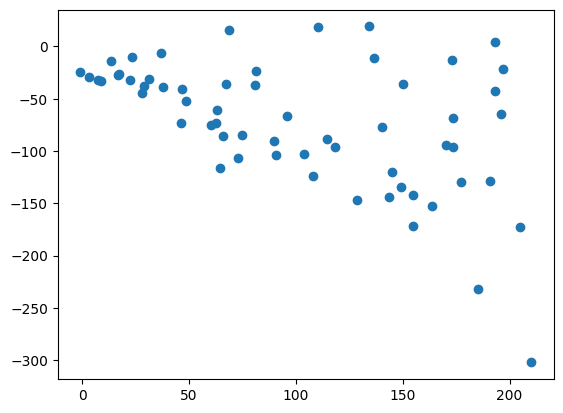

In [ ]:
#Plot residual
residuals_h = y_test - y_pred
plt.scatter(y_pred_h, residuals_h)

plt.show()

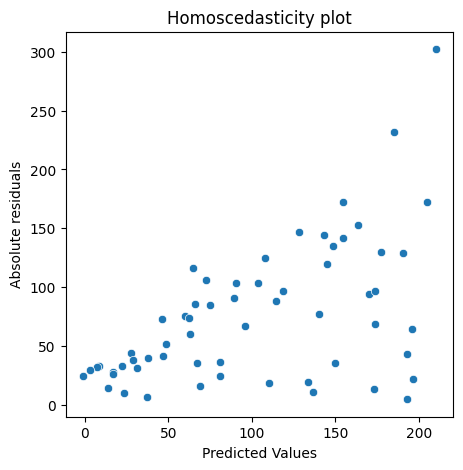

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred_h, y=np.abs(residuals_h))
plt.xlabel('Predicted Values')
plt.ylabel('Absolute residuals')
plt.title('Homoscedasticity plot')
plt.show()

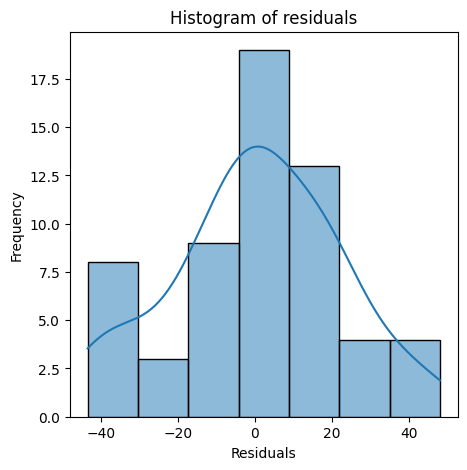

In [ ]:
#Plot normality of residuals
plt.figure(figsize=(5, 5))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()

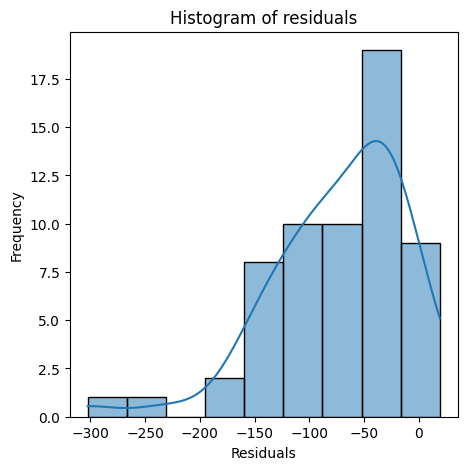

In [ ]:
#Plot normality of residuals
plt.figure(figsize=(5, 5))
sns.histplot(residuals_h, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()

<Figure size 500x500 with 0 Axes>

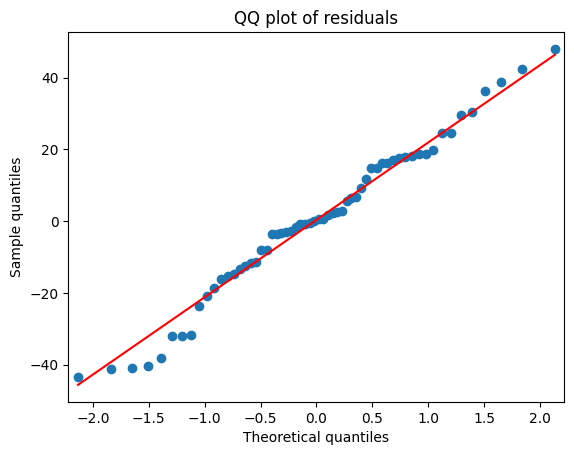

In [ ]:
#Plot QQ plot
import statsmodels.api as sm

plt.figure(figsize=(5, 5))
sm.qqplot(residuals, line='s')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.title('QQ plot of residuals')
plt.show()

In [ ]:
#Ahora lo haremos con el dataset de vinos

from sklearn import datasets
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [ ]:
pd.DataFrame(wine.data, columns=wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
#Split dataset into training and testing sets
# Convertir a DataFrame para facilitar el acceso por nombre de columna
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

X_w = wine_df.drop('flavanoids', axis=1) # Todas las columnas excepto 'flavanoids'
y_w = wine_df['flavanoids'] # La columna 'flavanoids' como variable a predecir

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size=0.3, random_state=42)

In [ ]:
# Calculate and display the correlation matrix
correlation_matrix = wine_df.corr()
print("Correlation Matrix:")
display(correlation_matrix)

# Calculate and display the covariance matrix
covariance_matrix = wine_df.cov()
print("\nCovariance Matrix:")
display(covariance_matrix)

NameError: name 'wine_df' is not defined

In [ ]:
#Fit regression model
model = LinearRegression()
model.fit(X_train_w, y_train_w)

# Predict the values using the test set
y_pred_w = model.predict(X_test_w)

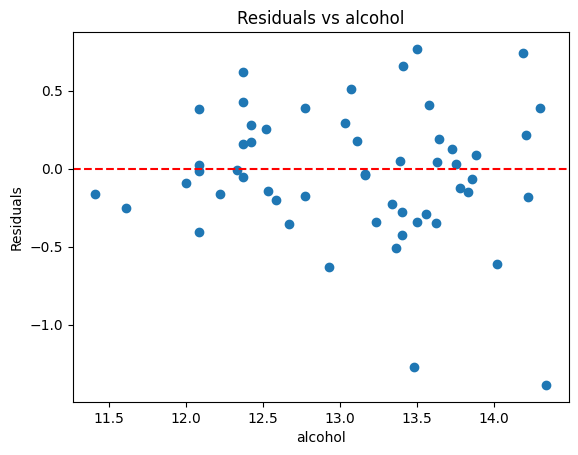

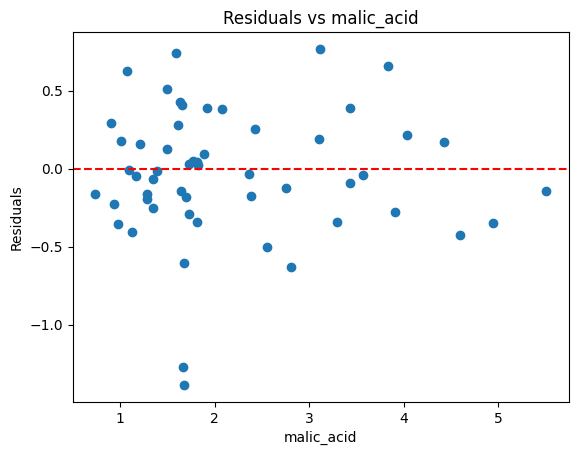

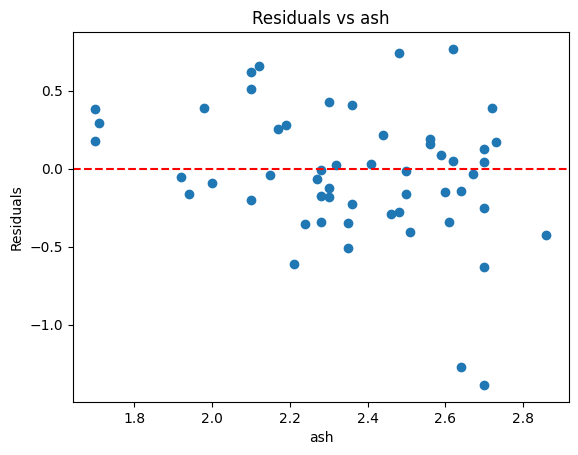

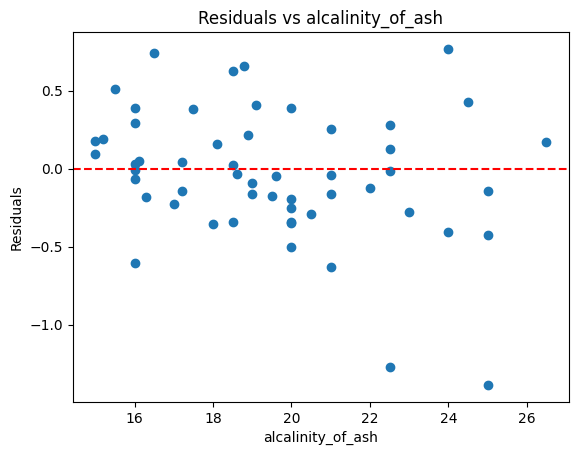

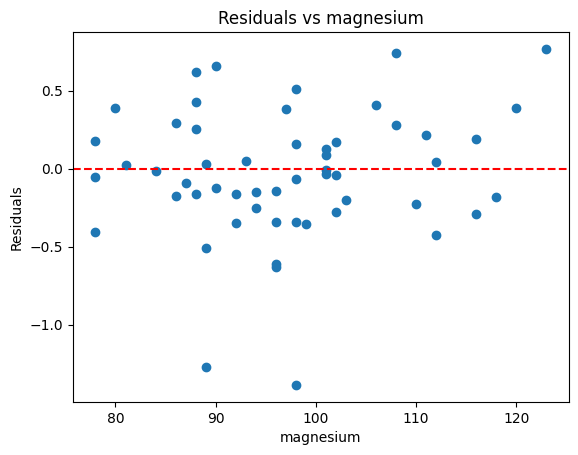

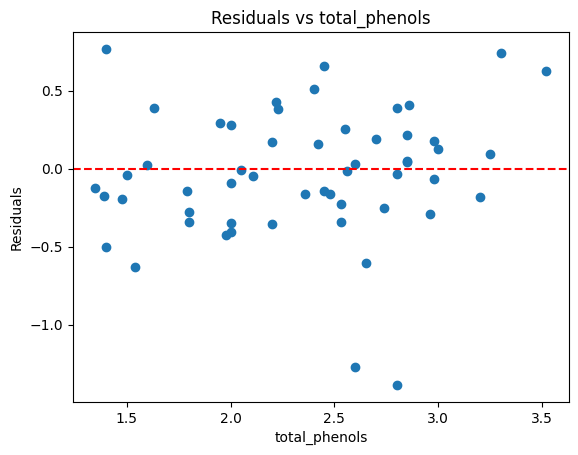

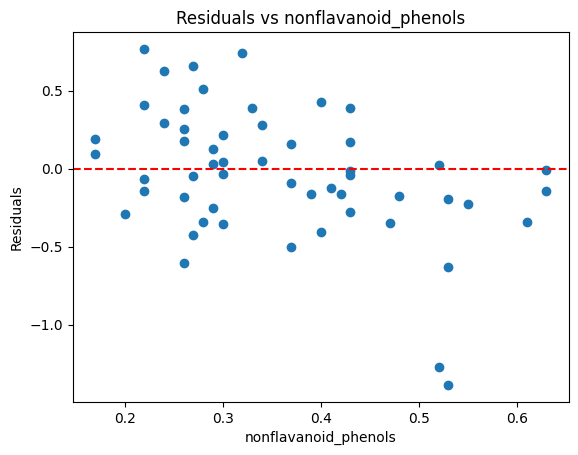

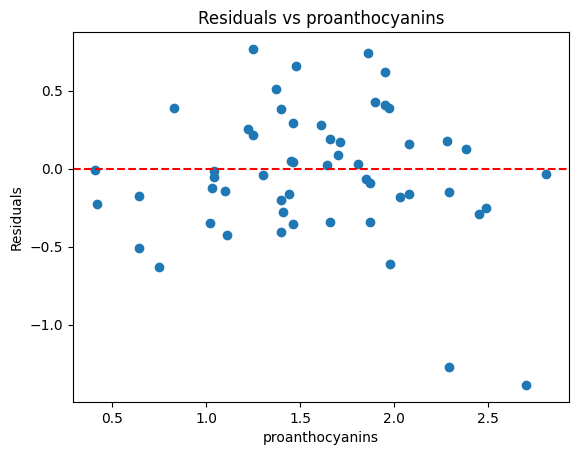

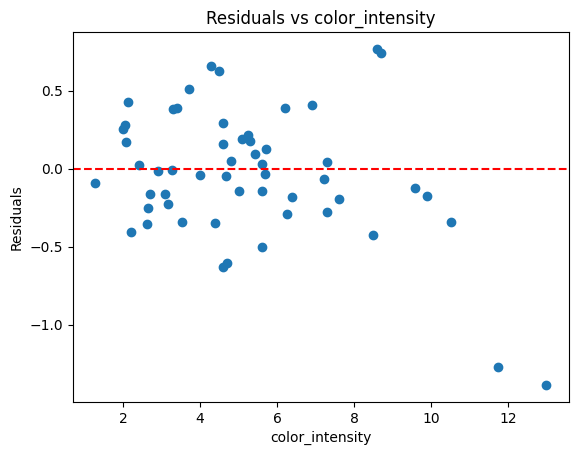

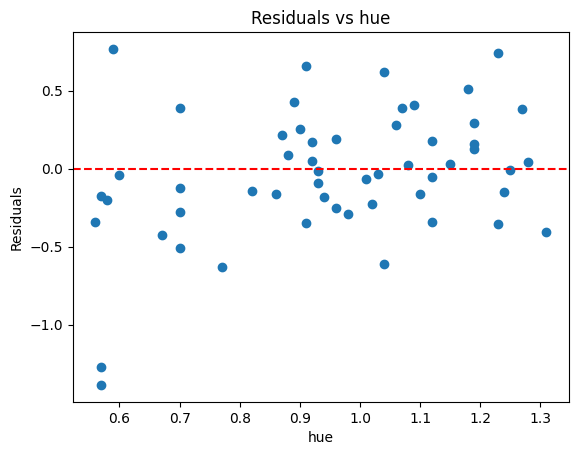

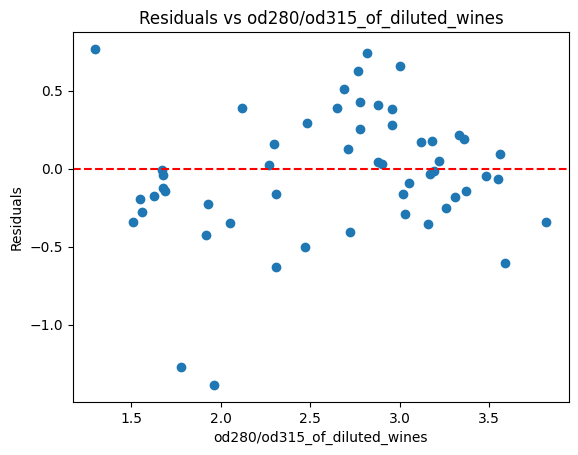

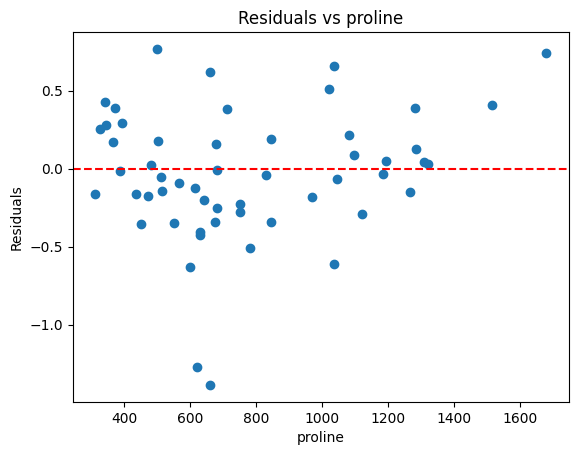

In [ ]:
residuals_w = y_test_w - y_pred_w

# Plot residuals against each independent variable
for col in X_test_w.columns:
    plt.scatter(X_test_w[col], residuals_w)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(col)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs {col}')
    plt.show()

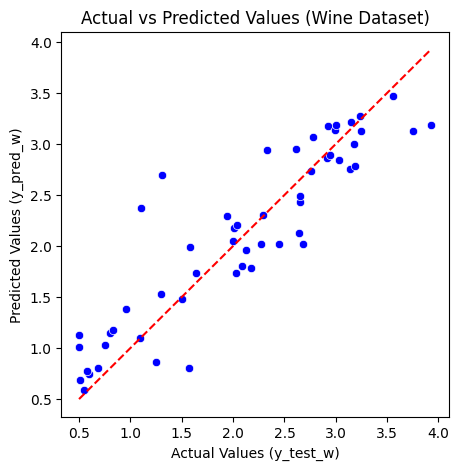

In [ ]:
#Plotting actual vs predicted values
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test_w, y=y_pred_w, color="blue")
plt.xlabel('Actual Values (y_test_w)')
plt.ylabel('Predicted Values (y_pred_w)')
plt.title('Actual vs Predicted Values (Wine Dataset)')

# Add a diagonal line for perfect prediction
plt.plot([min(y_test_w.min(), y_pred_w.min()), max(y_test_w.max(), y_pred_w.max())],
         [min(y_test_w.min(), y_pred_w.min()), max(y_test_w.max(), y_pred_w.max())],
         color='red', linestyle='--')

plt.show()